# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



First we need to define a labeled data set. Let's make a toy dataset.

In [179]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [180]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [181]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [182]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

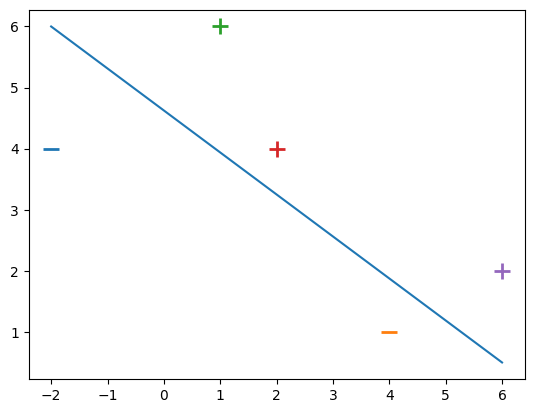

In [183]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else: 
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

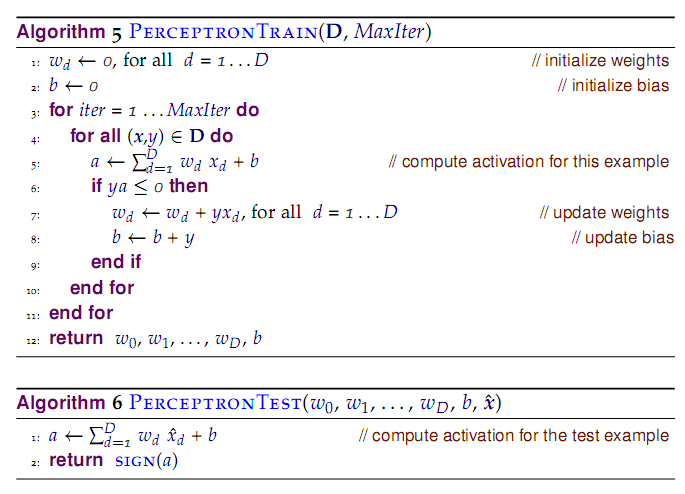

The algorithm is shown in the above image.

In [184]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [185]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

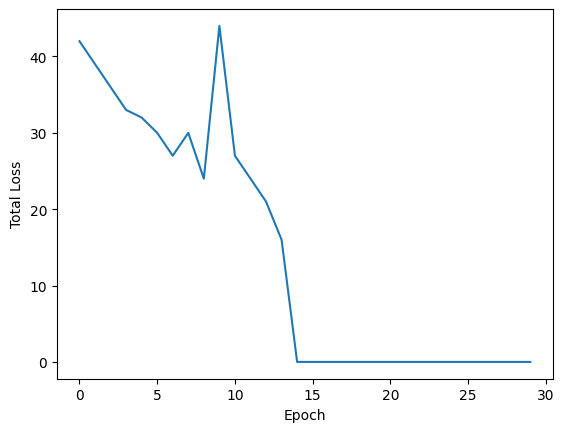

In [186]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

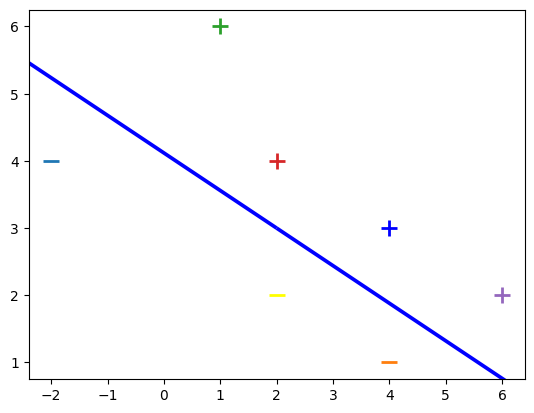

In [187]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [188]:
# 1st Answer

import ssl
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Disabling SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

# Load the Sonar dataset
sonar_data = pd.read_csv('/Users/apple/Desktop/ML/AIML_datasets/Sonar.csv')

In [189]:
sonar_data.shape
sonar_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [190]:
y = sonar_data['Class']
X = sonar_data.drop(['Class'],axis='columns')

In [191]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_std=scaler.fit_transform(X)
print(x_std)

[[-0.39955135 -0.04064823 -0.02692565 ...  0.06987027  0.17167808
  -0.65894689]
 [ 0.70353822  0.42163039  1.05561832 ... -0.47240644 -0.44455424
  -0.41985233]
 [-0.12922901  0.60106749  1.72340448 ...  1.30935987  0.25276128
   0.25758223]
 ...
 [ 1.00438083  0.16007801 -0.67384349 ...  0.90652575 -0.03913824
  -0.67887143]
 [ 0.04953255 -0.09539176  0.13480381 ... -0.00759783 -0.70402047
  -0.34015415]
 [-0.13794908 -0.06497869 -0.78861924 ... -0.6738235  -0.29860448
   0.99479044]]


In [192]:
from sklearn.decomposition import PCA
pca=PCA()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_std)
print(X_pca)

[[ 1.92116817 -1.37089312]
 [-0.48012458  7.58638801]
 [ 3.8592282   6.43986016]
 [ 4.59741943 -3.10408888]
 [-0.53386761  1.84984701]
 [-1.24701593  3.78548414]
 [ 1.87007312  2.49551038]
 [-2.05769816  2.3147504 ]
 [-1.64556277  0.25372155]
 [-4.28065736 -2.42781795]
 [-1.46164351 -6.32305562]
 [-2.46394888 -1.2537634 ]
 [-3.99546982  1.64506244]
 [ 0.6370814  -0.63741683]
 [-0.10539302 -0.25210417]
 [ 2.11242307  0.59393523]
 [ 4.39574903 -2.25749069]
 [ 1.43859617  1.90219042]
 [-1.03943408 -3.29436397]
 [-1.16485881  8.59655069]
 [ 2.64812566  1.66803742]
 [ 6.23535677 -1.47389049]
 [11.23389579 -2.75609298]
 [-0.24732176 -4.86351661]
 [ 2.65154822 -4.39934635]
 [-0.42203896 -7.16826626]
 [-3.69919995  2.49392786]
 [-2.90589296  0.16356259]
 [-1.8957691   1.49786172]
 [-2.38880313  1.37815246]
 [-2.32050849 -1.198227  ]
 [-3.50572573 -0.58086138]
 [ 0.04322219  0.36634604]
 [ 1.0292047   0.06587682]
 [-0.68903218  1.11801579]
 [-1.9337308   0.63038558]
 [ 0.26804541 -3.41912075]
 

In [193]:
X_sonar = np.append(X_pca,[[-1] for i in range(208)],axis = 1)
print(X_sonar)

[[ 1.92116817 -1.37089312 -1.        ]
 [-0.48012458  7.58638801 -1.        ]
 [ 3.8592282   6.43986016 -1.        ]
 [ 4.59741943 -3.10408888 -1.        ]
 [-0.53386761  1.84984701 -1.        ]
 [-1.24701593  3.78548414 -1.        ]
 [ 1.87007312  2.49551038 -1.        ]
 [-2.05769816  2.3147504  -1.        ]
 [-1.64556277  0.25372155 -1.        ]
 [-4.28065736 -2.42781795 -1.        ]
 [-1.46164351 -6.32305562 -1.        ]
 [-2.46394888 -1.2537634  -1.        ]
 [-3.99546982  1.64506244 -1.        ]
 [ 0.6370814  -0.63741683 -1.        ]
 [-0.10539302 -0.25210417 -1.        ]
 [ 2.11242307  0.59393523 -1.        ]
 [ 4.39574903 -2.25749069 -1.        ]
 [ 1.43859617  1.90219042 -1.        ]
 [-1.03943408 -3.29436397 -1.        ]
 [-1.16485881  8.59655069 -1.        ]
 [ 2.64812566  1.66803742 -1.        ]
 [ 6.23535677 -1.47389049 -1.        ]
 [11.23389579 -2.75609298 -1.        ]
 [-0.24732176 -4.86351661 -1.        ]
 [ 2.65154822 -4.39934635 -1.        ]
 [-0.42203896 -7.16826626

In [194]:
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def perceptron_algo_plot(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    n = 5
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w


array([  1.47899211,   0.17334354, -17.        ])

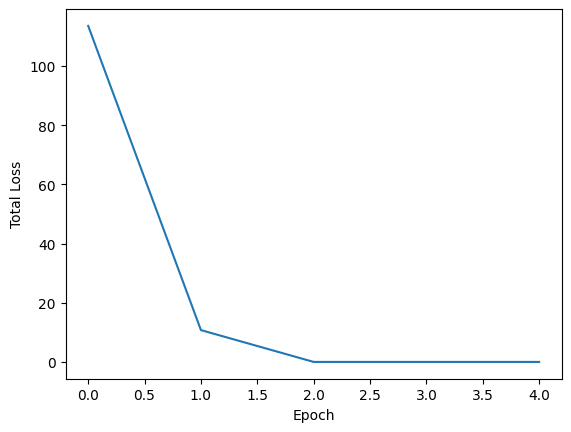

In [195]:
w2=perceptron_algo_plot(X_sonar, y)

w2

2nd Answer:


One essential hyperparameter for training machine learning models is the learning rate. It establishes the step size used for each parameter update of the model. An excessively high learning rate might lead to overshooting, which would cause the optimization to diverge or fluctuate about the minimum. On the other hand, an extremely low learning rate might cause convergence to happen slowly.




array([  1.47899211,   0.17334354, -17.        ])

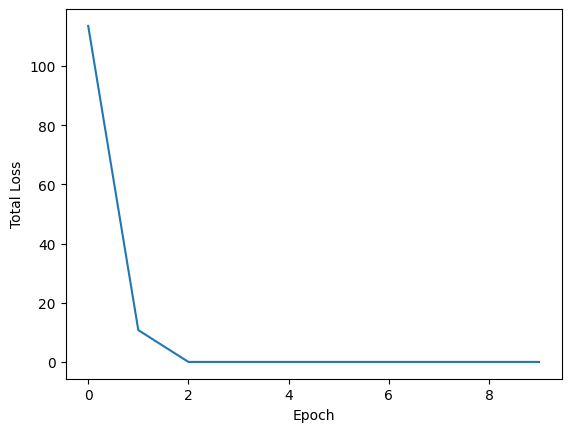

In [196]:
def perceptron_algo_plot1(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    n = 10
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w
perceptron_algo_plot1(X_sonar, y)


array([ 0.01478992,  0.00173344, -0.17      ])

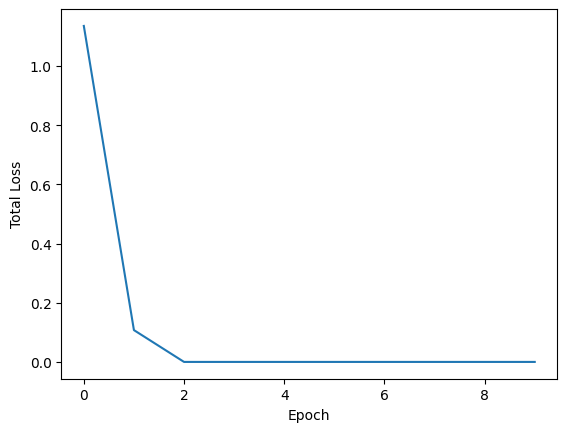

In [197]:
def perceptron_algo_plot1(X, Y):
    w = np.zeros(len(X[0]))
    eta = 0.01
    n = 10
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w
perceptron_algo_plot1(X_sonar, y)


array([  1478.99211012,    173.34353985, -17000.        ])

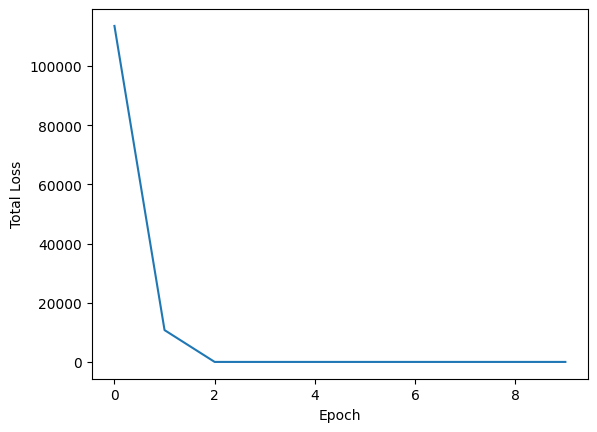

In [198]:
def perceptron_algo_plot1(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1000
    n = 10
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w
perceptron_algo_plot1(X_sonar, y)


3rd Answer:


When the perceptron algorithm is applied to a dataset that is not linearly separable, it won't converge to a solution that perfectly separates the classes.
Instead, it will iterate through the dataset trying to find a separating hyperplane, but it won't achieve zero error due to the nature of the data

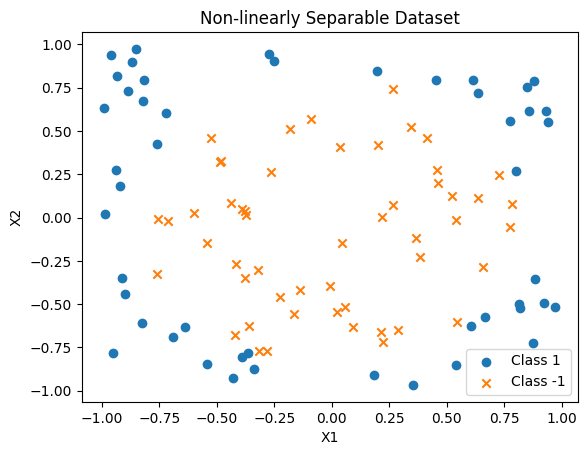

[0.66052384 0.57102163]


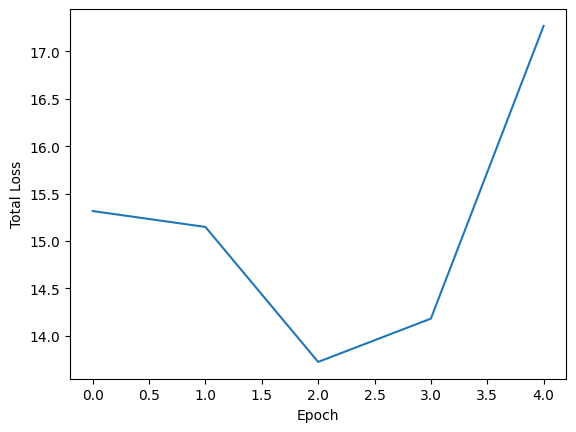

In [199]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(100, 2) * 2 - 1  # Random points in range [-1, 1]
y = np.where(X[:, 0]**2 + X[:, 1]**2 > 0.7, 1, -1)  # Classify based on distance from origin

# Plot the dataset
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', marker='o')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], label='Class -1', marker='x')
plt.title('Non-linearly Separable Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

perceptron_algo(X,y)
print(perceptron_algo_plot(X,y))

In [200]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [201]:
y = np.array([-1, -1, 1, -1, -1])

[-1.  1.  3.]


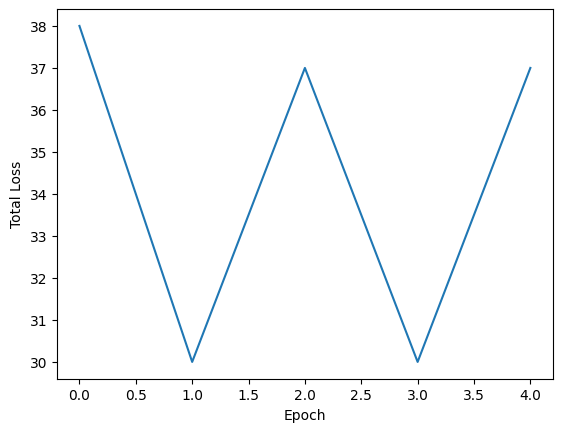

In [202]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.